In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [22]:
# This will create a random dataset that can be used for classification solution. 
# We can initialize a dataset with more features and to eliminate some features from that
X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0
)

In [20]:
# The classifier that is used for cross validation
clf = LogisticRegression()

# Initialize the cross validation object
cv = StratifiedKFold()

min_features_to_select = 1

# Create a recursive feature elimination cross validation function
rfecv = RFECV(
    estimator=clf,
    min_features_to_select=min_features_to_select,
    cv=cv,
    scoring='accuracy', # use 'accuracy' as the scoring parameter for feature elimination
    n_jobs=2,
    step=1
)

# Perform the feature elimination process
rfecv.fit(X=X, y=y)

print(f'Optimal number of features: {rfecv.n_features_}')

Optimal number of features: 3


### Plot number of features VS cross validation scores

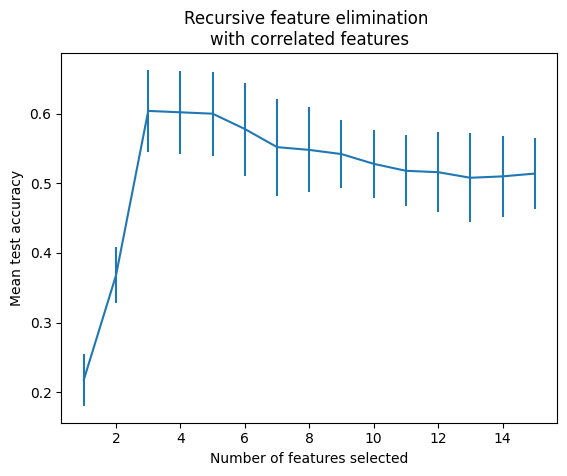

In [21]:
# Print the 
n_scores = len(rfecv.cv_results_['mean_test_score'])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=range(min_features_to_select, n_scores + min_features_to_select),
    y=rfecv.cv_results_['mean_test_score'],
    yerr=rfecv.cv_results_['std_test_score']
)
plt.title("Recursive feature elimination \nwith correlated features")
plt.show()